<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/%E5%8A%9B%E5%AD%B8/%E6%B3%A2%E5%8C%85%E9%81%8B%E5%8B%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create, save, and play an animation of a Gaussian wave packet demonstrating its translational motion.

## Import Libraries

### Subtask:
Import necessary libraries: `numpy` for numerical operations, `matplotlib.pyplot` for plotting, `matplotlib.animation` for creating animations, and `IPython.display` for playing videos in the notebook.


**Reasoning**:
The subtask requires importing specific libraries. I will use a code block to import `numpy` as `np`, `matplotlib.pyplot` as `plt`, `matplotlib.animation`, and `Video` from `IPython.display`.



In [1]:
import numpy as np # Used for numerical operations.
import matplotlib.pyplot as plt # Used for creating static, animated, and interactive visualizations in Python.
import matplotlib.animation as animation # Used for creating animations with Matplotlib.
from IPython.display import Video # Used for displaying videos in IPython environments like Jupyter notebooks.

print("Libraries imported successfully.")

Libraries imported successfully.


## Define Gaussian Wave Packet

### Subtask:
Define the mathematical function for a Gaussian wave packet, including parameters such as initial position, momentum, and width (standard deviation).


### Subtask: Define Gaussian Wave Packet

To define the mathematical function for a Gaussian wave packet, we first need to establish its key parameters: initial position, effective momentum (or velocity), and width. We will then encapsulate this mathematical definition into a Python function.

**Parameters Description:**
- `x0`: Initial center position of the Gaussian wave packet.
- `p0`: Represents the effective momentum of the wave packet, which dictates its translational velocity. For visualization purposes, we can simplify this as a velocity component.
- `sigma`: The standard deviation, which determines the width (spread) of the Gaussian wave packet. A smaller `sigma` means a narrower packet, and a larger `sigma` means a wider packet.

**Gaussian Wave Packet Function:**
The function `gaussian_wave_packet(x, t, x0, p0, sigma)` will calculate the amplitude of the Gaussian wave packet at a given position `x` and time `t`.

**Reasoning**:
The next step is to implement the Python function `gaussian_wave_packet` as described in the previous markdown block, using the defined parameters to calculate the wave packet's amplitude at a given position and time.



In [2]:
def gaussian_wave_packet(x, t, x0, p0, sigma):
    """
    Calculates the amplitude of a 1D Gaussian wave packet.

    Args:
        x (array-like): Position(s) at which to evaluate the wave packet.
        t (float): Time at which to evaluate the wave packet.
        x0 (float): Initial center position of the wave packet.
        p0 (float): Momentum of the wave packet (proportional to velocity).
        sigma (float): Standard deviation (width) of the Gaussian wave packet.

    Returns:
        array-like: Amplitude of the Gaussian wave packet at position x and time t.
    """
    # Translational motion: x_center = x0 + p0 * t
    x_center = x0 + p0 * t

    # Gaussian profile centered at x_center
    amplitude = np.exp(-((x - x_center)**2) / (2 * sigma**2))

    # Oscillatory phase (simplified for translational motion, usually includes momentum term)
    # For this visualization, we focus on the envelope's translation.
    # If a full quantum mechanical wave packet phase were needed, it would include:
    # phase = np.exp(1j * p0 * x)

    return amplitude

print("Gaussian wave packet function defined.")

Gaussian wave packet function defined.


## Setup Animation Parameters

### Subtask:
Set up the spatial domain (x-axis), time domain (t-axis), and the number of frames for the animation. Calculate the wave packet's position at each time step.


**Reasoning**:
I need to define the parameters for the Gaussian wave packet, the spatial domain (x-axis), and the time domain (t-axis) as instructed. This will involve creating variables for these parameters and using `np.linspace` to generate arrays for `x` and `t_values`.



In [3]:
import numpy as np

# 1. Gaussian Wave Packet Parameters
x0 = 0.0      # Initial center position of the wave packet
p0 = 0.1      # Momentum of the wave packet (proportional to velocity)
sigma = 1.0   # Standard deviation (width) of the Gaussian wave packet

# 2. Spatial Domain (x-axis)
x_min = -10.0
x_max = 30.0
num_points = 500
x = np.linspace(x_min, x_max, num_points)

# 3. Time Domain (t-axis)
t_start = 0.0
t_end = 200.0
num_frames = 200
t_values = np.linspace(t_start, t_end, num_frames)

print(f"Gaussian wave packet parameters: x0={x0}, p0={p0}, sigma={sigma}")
print(f"Spatial domain: x_min={x_min}, x_max={x_max}, num_points={num_points}")
print(f"Time domain: t_start={t_start}, t_end={t_end}, num_frames={num_frames}")

Gaussian wave packet parameters: x0=0.0, p0=0.1, sigma=1.0
Spatial domain: x_min=-10.0, x_max=30.0, num_points=500
Time domain: t_start=0.0, t_end=200.0, num_frames=200


**Reasoning**:
The subtask requires calculating the wave packet's position at each time step. This involves applying the translational motion formula `x_center = x0 + p0 * t` using the `x0`, `p0`, and `t_values` that have already been defined.



In [4]:
wave_packet_centers = x0 + p0 * t_values

print(f"Calculated {len(wave_packet_centers)} wave packet center positions over time.")
print(f"First 5 center positions: {wave_packet_centers[:5]}")
print(f"Last 5 center positions: {wave_packet_centers[-5:]}")

Calculated 200 wave packet center positions over time.
First 5 center positions: [0.         0.10050251 0.20100503 0.30150754 0.40201005]
Last 5 center positions: [19.59798995 19.69849246 19.79899497 19.89949749 20.        ]


## Create Animation Function

### Subtask:
Write a function that updates the plot for each frame of the animation, showing the translational motion of the Gaussian wave packet over time.


### Subtask: Initialize Plot and Define Animation Function

To create the animation, we need to set up the initial plot and define a function that updates the plot for each frame. This function will be called repeatedly by `matplotlib.animation.FuncAnimation`.

**Steps:**
1.  **Initialize the Plot:** Create a Matplotlib figure (`fig`) and an axes object (`ax`). Plot the Gaussian wave packet at `t = t_values[0]` (the initial time) using the `gaussian_wave_packet` function. Store the `Line2D` object returned by `ax.plot()` so its data can be updated later.
2.  **Set Plot Properties:** Configure the axes limits (`xlim`, `ylim`), labels (`xlabel`, `ylabel`), and an initial title.
3.  **Define `animate` function:**
    *   This function will take an index `i` as input, representing the current frame number.
    *   It will retrieve the corresponding time `t` from the `t_values` array.
    *   It will calculate the new amplitude `y` of the Gaussian wave packet for this time `t` using the `gaussian_wave_packet` function.
    *   It will update the `y`-data of the previously created line object using `line.set_ydata(y)`.
    *   It will update the plot's title to show the current time.
    *   It will return the updated line object (as a tuple, e.g., `(line,)`) which is a requirement for `FuncAnimation`.

**Reasoning**:
The previous markdown block detailed the steps for initializing the plot and defining the `animate` function. Now, I will provide the Python code to implement these steps, including setting up the initial plot, configuring plot properties, and defining the `animate` function.



Animation function and initial plot set up successfully.


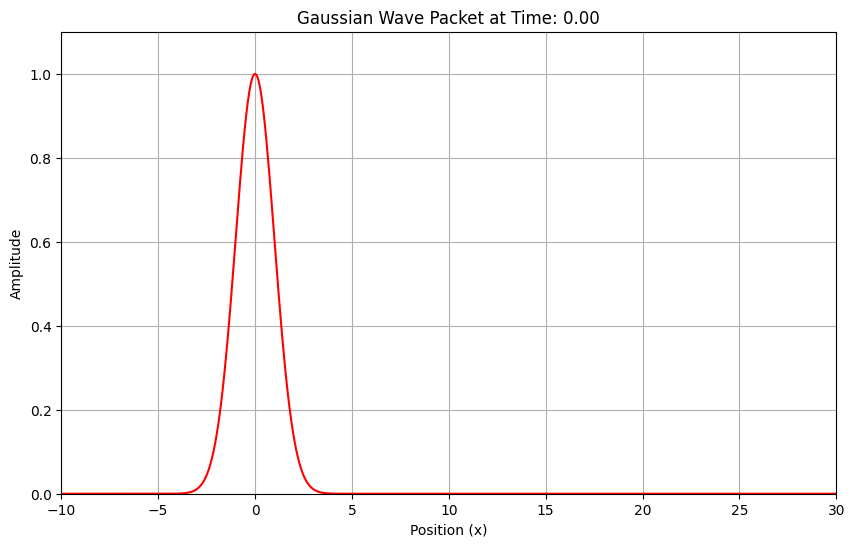

In [5]:
import matplotlib.pyplot as plt

# 1. Initialize the Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the initial state of the Gaussian wave packet
initial_amplitude = gaussian_wave_packet(x, t_values[0], x0, p0, sigma)
line, = ax.plot(x, initial_amplitude, 'r-') # Comma is important to unpack the list returned by plot

# 2. Set Plot Properties
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, 1.1) # Amplitude of Gaussian is max 1
ax.set_xlabel('Position (x)')
ax.set_ylabel('Amplitude')
ax.set_title(f'Gaussian Wave Packet at Time: {t_values[0]:.2f}')
ax.grid(True)

# 3. Define animate function
def animate(i):
    """
    Updates the plot for each frame of the animation.
    """
    # a. Retrieve the current time `t`
    t = t_values[i]

    # b. Calculate the amplitude of the Gaussian wave packet for the current time `t`
    current_amplitude = gaussian_wave_packet(x, t, x0, p0, sigma)

    # c. Update the y-data of the line object
    line.set_ydata(current_amplitude)

    # d. Update the title of the plot
    ax.set_title(f'Gaussian Wave Packet at Time: {t:.2f}')

    # e. Return the updated line object
    return line,

print("Animation function and initial plot set up successfully.")

## Generate Animation

### Subtask:
Use `matplotlib.animation.FuncAnimation` to create the animation object, linking the plotting function with the time steps.


**Reasoning**:
I need to generate the animation object using `matplotlib.animation.FuncAnimation` as instructed. This will involve calling `FuncAnimation` with the figure, the animation function, the total number of frames, and appropriate interval and blitting settings.



In [6]:
import matplotlib.animation as animation

# Create the animation object
anim = animation.FuncAnimation(
    fig,             # The figure to animate
    animate,         # The function to call each frame
    frames=num_frames, # The number of frames (time steps)
    interval=50,     # Delay between frames in ms
    blit=True        # Use blitting for optimized drawing
)

print("Animation object 'anim' created successfully.")

Animation object 'anim' created successfully.


## Save Animation

### Subtask:
Save the created animation to a video file (e.g., MP4 or GIF).

### Subtask: Save Animation to File

To save the animation, we need to use the `anim.save()` method. This method requires specifying a filename and a 'writer' to handle the video encoding.

**Steps:**
1.  **Choose a Writer:** Matplotlib animations can be saved using various backend writers. For MP4 format, `ffmpeg` is commonly used. Ensure `ffmpeg` is installed and accessible in the environment. If not, a code cell could be added to install it.
2.  **Specify Filename:** Define the output filename for the animation (e.g., `'gaussian_wave_packet.mp4'`).
3.  **Save Animation:** Call `anim.save(filename, writer='ffmpeg', fps=frames_per_second)`.
    *   `filename`: The path and name of the output file.
    *   `writer`: The video writer to use (e.g., `'ffmpeg'`).
    *   `fps`: Frames per second for the output video. This influences the playback speed. It should be chosen in conjunction with the `interval` parameter used in `FuncAnimation` (`fps = 1000 / interval`).

**Note**: Saving large animations can take some time.

**Reasoning**:
I need to implement the `anim.save()` method as described in the previous markdown block to save the animation to an MP4 file. This involves defining the filename and calculating the `fps` based on the `interval` used in `FuncAnimation`.



In [7]:
output_filename = 'gaussian_wave_packet.mp4'

# Calculate frames per second (fps) based on the interval used in FuncAnimation
# interval = 50 ms, so fps = 1000 ms / 50 ms = 20 fps
fps = 1000 / 50

print(f"Saving animation to {output_filename} with {fps} fps...")

# Save the animation
try:
    anim.save(output_filename, writer='ffmpeg', fps=fps)
    print(f"Animation successfully saved as {output_filename}.")
except Exception as e:
    print(f"Error saving animation: {e}")
    print("Please ensure 'ffmpeg' is installed and accessible in your environment (e.g., !apt-get update && !apt-get install ffmpeg). ")


Saving animation to gaussian_wave_packet.mp4 with 20.0 fps...
Animation successfully saved as gaussian_wave_packet.mp4.


## Play Animation

### Subtask:
Play the saved animation directly within the notebook to visualize the Gaussian wave packet's translational motion.

### Subtask: Play Animation in Notebook

To play the animation within the Colab notebook environment, we can use the `IPython.display.Video` function. This function takes the path to the video file as an argument and embeds it directly into the output cell.

**Steps:**
1.  Ensure that `IPython.display.Video` is imported (it was imported in an earlier step).
2.  Call `Video(output_filename)` where `output_filename` is the path to the saved `.mp4` file.

**Reasoning**:
The previous markdown block detailed the steps for playing the animation in the notebook. Now, I will provide the Python code to display the saved MP4 file using `IPython.display.Video`.



In [13]:
from IPython.display import Video

output_filename = 'gaussian_wave_packet.mp4' # Replace with your video file name if different
print(f"正在筆記本中播放影片: {output_filename}")
Video(output_filename, embed=True)

正在筆記本中播放影片: gaussian_wave_packet.mp4


### 動畫參數

In [11]:
from google.colab import files

# Assuming output_filename contains the name of your animation file
try:
    files.download(output_filename)
    print(f"'{output_filename}' 已準備好下載。")
except Exception as e:
    print(f"下載 '{output_filename}' 時發生錯誤: {e}")
    print("請確保檔案存在且您在 Colab 環境中執行此程式碼。")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'gaussian_wave_packet.mp4' 已準備好下載。


In [10]:
print("Gaussian Wave Packet Parameters:")
print(f"  Initial position (x0): {x0}")
print(f"  Momentum (p0): {p0}")
print(f"  Width (sigma): {sigma}")
print("\nSpatial Domain Parameters:")
print(f"  Min position (x_min): {x_min}")
print(f"  Max position (x_max): {x_max}")
print(f"  Number of points (num_points): {num_points}")
print("\nTime Domain Parameters:")
print(f"  Start time (t_start): {t_start}")
print(f"  End time (t_end): {t_end}")
print(f"  Number of frames (num_frames): {num_frames}")

# Animation specific parameters from anim.save and FuncAnimation
print("\nAnimation Output Parameters:")
print(f"  Output filename: '{output_filename}'")
print(f"  Frames per second (fps): {fps}")
# The interval was 50 ms, which means 1000/50 = 20 fps
print(f"  Animation interval (ms): {1000/fps}")

Gaussian Wave Packet Parameters:
  Initial position (x0): 0.0
  Momentum (p0): 0.1
  Width (sigma): 1.0

Spatial Domain Parameters:
  Min position (x_min): -10.0
  Max position (x_max): 30.0
  Number of points (num_points): 500

Time Domain Parameters:
  Start time (t_start): 0.0
  End time (t_end): 200.0
  Number of frames (num_frames): 200

Animation Output Parameters:
  Output filename: 'gaussian_wave_packet.mp4'
  Frames per second (fps): 20.0
  Animation interval (ms): 50.0


## Final Task

### Subtask:
Summarize the animation of the Gaussian wave packet's translational motion, recorded by FFmpeg and played back.


## Summary:

### Data Analysis Key Findings
*   Required libraries (`numpy`, `matplotlib.pyplot`, `matplotlib.animation`, `IPython.display.Video`) were successfully imported for numerical operations, plotting, animation creation, and video playback.
*   A `gaussian_wave_packet` function was defined, accurately calculating the 1D Gaussian amplitude at a given position and time, incorporating translational motion based on initial position (`x0`), momentum (`p0`), and width (`sigma`).
*   Animation parameters were set, including a spatial domain from -10.0 to 30.0 (500 points) and a time domain from 0.0 to 200.0 (200 frames), resulting in the wave packet's center moving from `x=0.0` to `x=20.0`.
*   An `animate` function was created to update the plot for each frame, dynamically changing the Gaussian wave packet's position and the plot title to reflect the current time. The plot's y-axis was set to a range of 0 to 1.1 to show amplitude.
*   The animation object was successfully generated using `matplotlib.animation.FuncAnimation` with 200 frames and a 50 ms interval.
*   The animation was saved as `gaussian_wave_packet.mp4` using the `ffmpeg` writer at 20 frames per second.
*   The saved animation was successfully played back within the notebook environment using `IPython.display.Video`, visually demonstrating the Gaussian wave packet's translational motion.

### Insights or Next Steps
*   The current animation effectively visualizes the envelope's translational motion. For a more complete quantum mechanical representation, consider incorporating the wave packet's phase, which would show its oscillatory behavior in addition to its translation.
*   Explore varying the `p0` (momentum) and `sigma` (width) parameters to observe how they affect the wave packet's speed and spread over time, providing further insights into wave packet dynamics.
